| **Inicio** | **atrás 6** |
|----------- |-------------- |
| [🏠](../README.md) | [⏪](./6_Optimizacion_y_Ajuste__de_Modelos.ipynb)|

# **7. Desafíos Específicos y Avanzados**

## **Aprendizaje Semi-Supervisado y Aprendizaje por Reforzamiento**

### **Conceptos y aplicaciones**

**Aprendizaje Semi-Supervisado**

**Concepto:**

El aprendizaje semi-supervisado es un enfoque que utiliza tanto datos etiquetados como no etiquetados para entrenar modelos. Dado que recopilar datos etiquetados puede ser costoso y laborioso, el aprendizaje semi-supervisado aprovecha datos no etiquetados para mejorar el rendimiento del modelo.

**Aplicaciones:**

1. **Clasificación de Documentos:**

   - **Datos Etiquetados:** Documentos con categorías conocidas.
   - **Datos No Etiquetados:** Documentos sin categorías.
   - **Ejemplo:** Clasificación de noticias en categorías basada en documentos etiquetados y no etiquetados.

2. **Clasificación de Imágenes:**

   - **Datos Etiquetados:** Imágenes con etiquetas.
   - **Datos No Etiquetados:** Imágenes sin etiquetas.
   - **Ejemplo:** Clasificación de imágenes de redes sociales con etiquetas limitadas.

**Ejemplo en Código Python:**

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Cargar datos de dígitos (ejemplo con pocos datos etiquetados)
digits = load_digits()
X_all, y_all = digits.data, digits.target

# Crear conjunto con solo 50 datos etiquetados
X_labeled, _, y_labeled, _ = train_test_split(X_all, y_all, test_size=0.95, stratify=y_all)

# Crear conjunto no etiquetado
X_unlabeled = X_all[np.isin(X_all, X_labeled).all(axis=1)]

# Modelo de clasificación
model = RandomForestClassifier()

# Entrenar con datos etiquetados y no etiquetados
model.fit(X_labeled, y_labeled)
accuracy_labeled = model.score(X_all, y_all)

print(f"Exactitud con datos etiquetados: {accuracy_labeled:.2f}")

Exactitud con datos etiquetados: 0.86


**Aprendizaje por Reforzamiento**

**Concepto:**

El aprendizaje por reforzamiento es un paradigma de aprendizaje automático donde un agente toma decisiones en un entorno para maximizar una recompensa acumulativa a lo largo del tiempo. El agente aprende a través de la retroalimentación del entorno, ajustando sus acciones para obtener recompensas mayores.

**Aplicaciones:**

1. **Juegos:**

   - **Entorno:** Tablero de juego.
   - **Acciones:** Movimientos en el juego.
   - **Recompensa:** Puntos ganados.
   - **Ejemplo:** Entrenar un agente para jugar ajedrez.

2. **Robótica:**

   - **Entorno:** Espacio físico.
   - **Acciones:** Movimientos y acciones del robot.
   - **Recompensa:** Éxito en tareas específicas.
   - **Ejemplo:** Enseñar a un robot a realizar tareas domésticas.

**Ejemplo en Código Python:**

In [3]:
import numpy as np

# Definir el entorno (por ejemplo, un juego simple)
num_states = 5
num_actions = 3
transition_probabilities = np.random.rand(num_states, num_actions, num_states)
transition_probabilities /= transition_probabilities.sum(axis=2, keepdims=True)  # Asegurar que las probabilidades sumen 1
rewards = np.random.rand(num_states, num_actions, num_states)

# Función de transición
def transition(state, action):
    next_state_prob = transition_probabilities[state, action, :]
    next_state = np.random.choice(num_states, p=next_state_prob)
    reward = rewards[state, action, next_state]
    return next_state, reward

# Algoritmo de aprendizaje por refuerzo simple
def q_learning(initial_state, num_episodes=1000, alpha=0.1, gamma=0.9):
    q_values = np.zeros((num_states, num_actions))
    for episode in range(num_episodes):
        state = initial_state
        while True:
            action = np.argmax(q_values[state, :])
            next_state, reward = transition(state, action)
            q_values[state, action] += alpha * (reward + gamma * np.max(q_values[next_state, :]) - q_values[state, action])
            state = next_state
            if state == 0:  # Estado objetivo
                break
    return q_values

# Ejecutar el aprendizaje
learned_q_values = q_learning(initial_state=1, num_episodes=1000)

print("Q-values aprendidos:")
print(learned_q_values)

Q-values aprendidos:
[[0.         0.         0.        ]
 [1.41674687 0.         0.        ]
 [1.31608066 0.         0.        ]
 [1.3152728  0.         0.        ]
 [1.11896361 0.         0.        ]]


Estos son ejemplos simples para ilustrar los conceptos. En entornos más complejos, se utilizan algoritmos y técnicas más avanzadas.

## **Machine Learning Interpretability y Ética**

### **Explicabilidad de modelos y consideraciones éticas**

La explicabilidad de modelos y las consideraciones éticas en machine learning son temas cruciales, especialmente cuando se aplican modelos en entornos sensibles o que afectan a individuos. A continuación, se proporciona una explicación detallada y ejemplos.

**Explicabilidad de Modelos:**

**¿Por qué es importante la explicabilidad?**

1. **Rendición de cuentas:** Los modelos de machine learning a menudo toman decisiones críticas. La explicabilidad ayuda a responsabilizar a los desarrolladores y a entender cómo se llega a una determinada predicción.

2. **Confiabilidad:** Modelos más comprensibles son más propensos a ser confiables. Usuarios y partes interesadas confiarán más en un modelo cuyo comportamiento puedan entender.

3. **Ética y Transparencia:** La explicabilidad es crucial para garantizar que los modelos no estén sesgados y para entender cómo pueden afectar a diferentes grupos de personas.

**Métodos para la Explicabilidad:**

1. **Interpretabilidad intrínseca:** Algunos modelos son naturalmente interpretables, como la regresión lineal o los árboles de decisión.

2. **Métodos de aproximación:** Utilizar métodos como SHAP (SHapley Additive exPlanations) o LIME (Local Interpretable Model-agnostic Explanations) para aproximar la explicabilidad de modelos más complejos.

3. **Visualizaciones:** Mostrar visualmente cómo el modelo toma decisiones puede hacerlo más comprensible. Por ejemplo, gráficos de importancia de características.

**Ejemplo de SHAP (SHapley Additive exPlanations):**

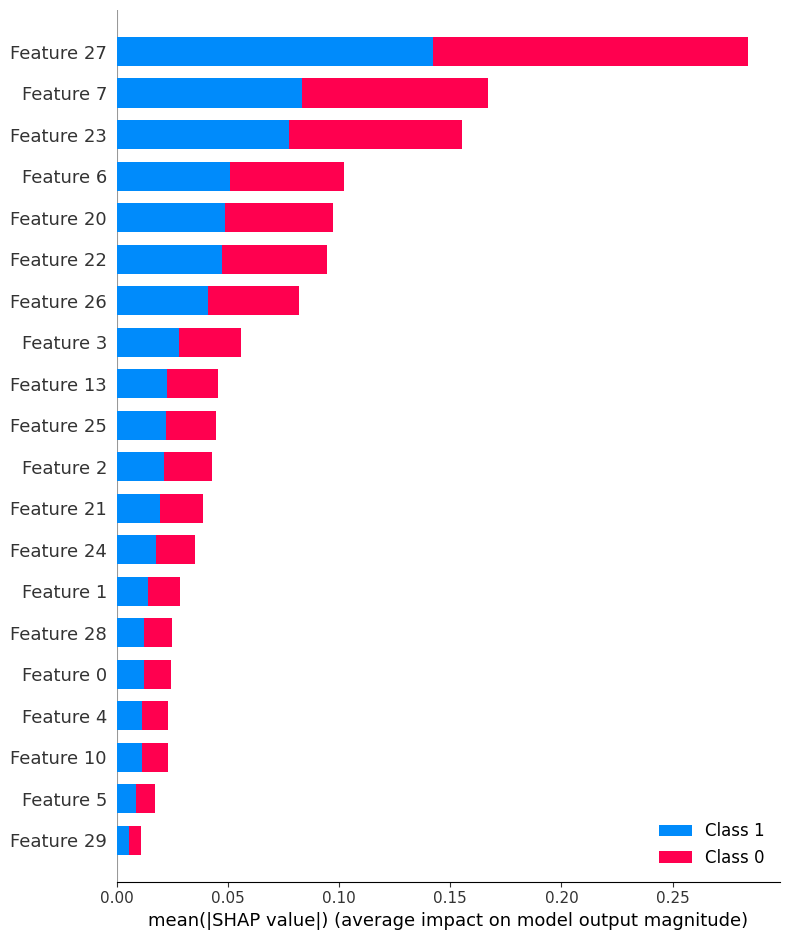

In [5]:
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer

# Cargar conjunto de datos
data = load_breast_cancer()
X, y = data.data, data.target

# Entrenar un modelo de clasificación (Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Crear un objeto explainer de SHAP
explainer = shap.Explainer(model)

# Calcular los valores SHAP para varias observaciones (no solo una)
shap_values = explainer.shap_values(X[:10, :])  # Modificado para tomar múltiples observaciones

# Resumen de las contribuciones de las características
shap.summary_plot(shap_values, X[:10, :])  # Modificado para tomar múltiples observaciones

**Consideraciones Éticas:**

**Sesgo y Equidad:**

1. **Sesgo en Datos de Entrenamiento:** Si los datos de entrenamiento son sesgados, el modelo también lo será. Es esencial auditar y abordar los sesgos en los datos.

2. **Evaluación de Equidad:** Evaluar el impacto del modelo en diferentes grupos demográficos para asegurar la equidad. Métricas como la disparidad de impacto y la igualdad de oportunidades son útiles.

**Privacidad:**

1. **Anonimización de Datos:** Proteger la privacidad de los individuos anonimizando datos personales.

2. **Modelos Locales:** En lugar de enviar datos a un servidor centralizado, se pueden utilizar modelos locales para mantener la privacidad.

**Seguridad:**

1. **Adversarial Attacks:** Considerar posibles ataques maliciosos. Un modelo debe ser robusto ante intentos de manipulación.

**Ejemplo de Sesgo en Modelos:**

In [6]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Supongamos un conjunto de datos con sesgo de género
# ...

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.956140350877193


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Aquí, si el conjunto de datos de entrenamiento tiene sesgo de género, el modelo aprenderá y replicará ese sesgo. Evaluar y abordar el sesgo es fundamental desde una perspectiva ética.

Estas consideraciones y ejemplos destacan la importancia de abordar la explicabilidad y las cuestiones éticas en machine learning para garantizar un uso responsable y equitativo de los modelos.

| **Inicio** | **atrás 6** |
|----------- |-------------- |
| [🏠](../README.md) | [⏪](./6_Optimizacion_y_Ajuste__de_Modelos.ipynb)|